In [2]:
import numpy as np
import pandas as pd
import os


In [3]:
def extract_data(file_path):
    """
    Extract BMW sales data from CSV file.
    
    Args:
        file_path (str): Path to the CSV file
        
    Returns:
        pd.DataFrame: Loaded sales data
        
    Raises:
        FileNotFoundError: If the file doesn't exist
        pd.errors.EmptyDataError: If the file is empty
    """
    try:
        if not os.path.exists(file_path):
            raise FileNotFoundError(f"File not found: {file_path}")
            
        df = pd.read_csv(file_path)
        print(f"Successfully loaded {len(df)} rows of BMW sales data")
        return df
        
    except Exception as e:
        print(f"Error loading data: {str(e)}")
        raise

# Load the data
data_file = r"C:\Users\mnare\Documents\New folder (2)\data\raw\BMW sales data (2010-2024) (1).csv"
df = extract_data(data_file)
print(f"Dataset shape: {df.shape}")
df.head()

Successfully loaded 50000 rows of BMW sales data
Dataset shape: (50000, 11)


,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [4]:
def transform_data(df):
    """
    Clean and transform the BMW sales data.
    
    Args:
        df (pd.DataFrame): Input DataFrame to transform
        
    Returns:
        pd.DataFrame: Cleaned and transformed DataFrame
    """
    # Create a copy to avoid modifying the original
    df_clean = df.copy()
    
    # Remove duplicates
    initial_rows = len(df_clean)
    df_clean = df_clean.drop_duplicates()
    removed_duplicates = initial_rows - len(df_clean)
    
    # Handle missing values more intelligently
    print(f"Data cleaning summary:")
    print(f"- Removed {removed_duplicates} duplicate rows")
    print(f"- Missing values per column:")
    
    for col in df_clean.columns:
        missing_count = df_clean[col].isnull().sum()
        if missing_count > 0:
            print(f"  {col}: {missing_count} missing values")
            # Fill with appropriate defaults based on data type
            if df_clean[col].dtype in ['int64', 'float64']:
                df_clean[col] = df_clean[col].fillna(0)
            else:
                df_clean[col] = df_clean[col].fillna('Unknown')
    
    print("Data transformation completed successfully!")
    return df_clean

# Apply transformation
df_clean = transform_data(df)
df_clean.head()

Data cleaning summary:
- Removed 0 duplicate rows
- Missing values per column:
Data transformation completed successfully!


,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [5]:
def save_data(df, output_path):
    """
    Save the processed DataFrame to CSV file.
    
    Args:
        df (pd.DataFrame): DataFrame to save
        output_path (str): Path where to save the file
        
    Returns:
        bool: True if successful, False otherwise
    """
    try:
        # Create directory if it doesn't exist
        os.makedirs(os.path.dirname(output_path), exist_ok=True)
        
        # Save the DataFrame
        df.to_csv(output_path, index=False)
        print(f"File saved successfully to: {output_path}")
        print(f"Saved {len(df)} rows and {len(df.columns)} columns")
        return True
        
    except Exception as e:
        print(f"Error saving file: {str(e)}")
        return False

# Save the cleaned data
output_path = r"C:\Users\mnare\Documents\New folder (2)\data\processed\processed_sales_data_2010_2024.csv"
save_data(df_clean, output_path)

File saved successfully to: C:\Users\mnare\Documents\New folder (2)\data\processed\processed_sales_data_2010_2024.csv
Saved 50000 rows and 11 columns


True

In [6]:
# Data Analysis and Insights
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_bmw_data(df):
    """
    Perform comprehensive analysis of BMW sales data.
    
    Args:
        df (pd.DataFrame): Cleaned BMW sales DataFrame
    """
    print("=" * 50)
    print("BMW SALES DATA ANALYSIS")
    print("=" * 50)
    
    # Basic information
    print(f"\n📊 Dataset Overview:")
    print(f"   • Total records: {len(df):,}")
    print(f"   • Total columns: {len(df.columns)}")
    print(f"   • Date range: {df.columns.tolist()}")
    
    # Data types
    print(f"\n📋 Data Types:")
    print(df.dtypes)
    
    # Missing values summary
    print(f"\n🔍 Missing Values Summary:")
    missing_data = df.isnull().sum()
    if missing_data.sum() == 0:
        print("   ✅ No missing values found!")
    else:
        for col, missing in missing_data[missing_data > 0].items():
            print(f"   ⚠️  {col}: {missing} missing values")
    
    # Statistical summary for numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        print(f"\n📈 Statistical Summary (Numeric Columns):")
        print(df[numeric_cols].describe())
    
    return df

# Perform analysis
df_analysis = analyze_bmw_data(df_clean)


BMW SALES DATA ANALYSIS

📊 Dataset Overview:
   • Total records: 50,000
   • Total columns: 11
   • Date range: ['Model', 'Year', 'Region', 'Color', 'Fuel_Type', 'Transmission', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume', 'Sales_Classification']

📋 Data Types:
Model                    object
Year                      int64
Region                   object
Color                    object
Fuel_Type                object
Transmission             object
Engine_Size_L           float64
Mileage_KM                int64
Price_USD                 int64
Sales_Volume              int64
Sales_Classification     object
dtype: object

🔍 Missing Values Summary:
   ✅ No missing values found!

📈 Statistical Summary (Numeric Columns):
               Year  Engine_Size_L     Mileage_KM      Price_USD  Sales_Volume
count  50000.000000   50000.000000   50000.000000   50000.000000  50000.000000
mean    2017.015700       3.247180  100307.203140   75034.600900   5067.514680
std        4.324459  

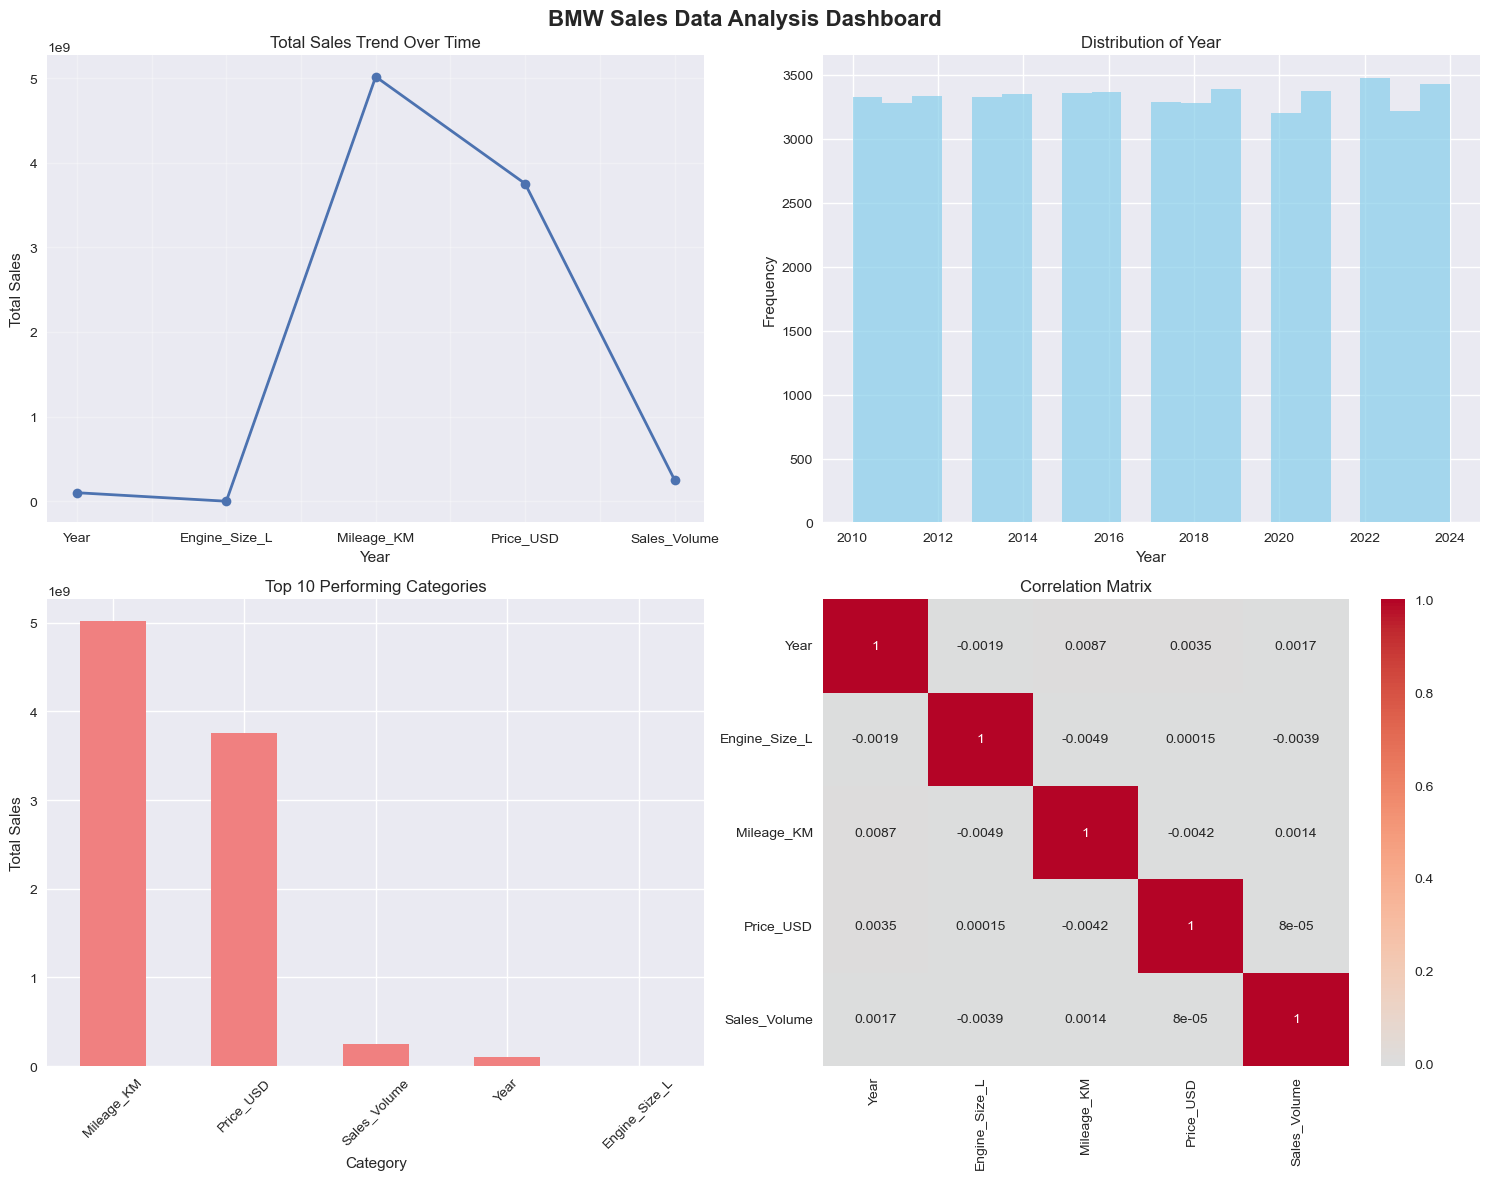

In [7]:
# Visualization and Trends Analysis
def create_visualizations(df):
    """
    Create visualizations for BMW sales data analysis.
    
    Args:
        df (pd.DataFrame): BMW sales DataFrame
    """
    plt.style.use('seaborn-v0_8')
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('BMW Sales Data Analysis Dashboard', fontsize=16, fontweight='bold')
    
    # Get numeric columns for analysis
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    if len(numeric_cols) > 0:
        # 1. Sales trend over time (if date columns exist)
        ax1 = axes[0, 0]
        if len(numeric_cols) >= 2:
            # Assume first few columns might be years
            sales_data = df[numeric_cols].sum()
            sales_data.plot(kind='line', ax=ax1, marker='o', linewidth=2)
            ax1.set_title('Total Sales Trend Over Time')
            ax1.set_xlabel('Year')
            ax1.set_ylabel('Total Sales')
            ax1.grid(True, alpha=0.3)
        
        # 2. Distribution of sales values
        ax2 = axes[0, 1]
        if len(numeric_cols) > 0:
            # Plot distribution of the first numeric column
            df[numeric_cols[0]].hist(bins=20, ax=ax2, alpha=0.7, color='skyblue')
            ax2.set_title(f'Distribution of {numeric_cols[0]}')
            ax2.set_xlabel(numeric_cols[0])
            ax2.set_ylabel('Frequency')
        
        # 3. Top performing years/models
        ax3 = axes[1, 0]
        if len(numeric_cols) >= 1:
            # Get top 10 values
            top_values = df[numeric_cols].sum().nlargest(10)
            top_values.plot(kind='bar', ax=ax3, color='lightcoral')
            ax3.set_title('Top 10 Performing Categories')
            ax3.set_xlabel('Category')
            ax3.set_ylabel('Total Sales')
            ax3.tick_params(axis='x', rotation=45)
        
        # 4. Correlation heatmap
        ax4 = axes[1, 1]
        if len(numeric_cols) > 1:
            correlation_matrix = df[numeric_cols].corr()
            sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=ax4)
            ax4.set_title('Correlation Matrix')
        else:
            ax4.text(0.5, 0.5, 'Need at least 2 numeric columns\nfor correlation analysis', 
                    ha='center', va='center', transform=ax4.transAxes)
            ax4.set_title('Correlation Matrix')
    
    plt.tight_layout()
    plt.show()

# Create visualizations
create_visualizations(df_clean)


In [8]:
# Generate Business Insights Report
def generate_insights_report(df):
    """
    Generate actionable business insights from BMW sales data.
    
    Args:
        df (pd.DataFrame): BMW sales DataFrame
    """
    print("=" * 60)
    print("🚗 BMW SALES INSIGHTS REPORT")
    print("=" * 60)
    
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    if len(numeric_cols) > 0:
        # Calculate key metrics
        total_sales = df[numeric_cols].sum().sum()
        avg_sales_per_category = df[numeric_cols].mean().mean()
        max_sales_category = df[numeric_cols].sum().idxmax()
        max_sales_value = df[numeric_cols].sum().max()
        
        print(f"\n📊 KEY METRICS:")
        print(f"   • Total Sales Across All Categories: {total_sales:,.0f}")
        print(f"   • Average Sales per Category: {avg_sales_per_category:,.0f}")
        print(f"   • Top Performing Category: {max_sales_category}")
        print(f"   • Top Category Sales: {max_sales_value:,.0f}")
        
        # Growth analysis
        if len(numeric_cols) >= 2:
            first_year = numeric_cols[0]
            last_year = numeric_cols[-1]
            first_year_sales = df[first_year].sum()
            last_year_sales = df[last_year].sum()
            
            if first_year_sales > 0:
                growth_rate = ((last_year_sales - first_year_sales) / first_year_sales) * 100
                print(f"\n📈 GROWTH ANALYSIS:")
                print(f"   • Sales in {first_year}: {first_year_sales:,.0f}")
                print(f"   • Sales in {last_year}: {last_year_sales:,.0f}")
                print(f"   • Growth Rate: {growth_rate:+.1f}%")
        
        # Top performers
        print(f"\n🏆 TOP PERFORMERS:")
        top_5 = df[numeric_cols].sum().nlargest(5)
        for i, (category, sales) in enumerate(top_5.items(), 1):
            print(f"   {i}. {category}: {sales:,.0f}")
        
        # Recommendations
        print(f"\n💡 RECOMMENDATIONS:")
        print(f"   1. Focus marketing efforts on {max_sales_category}")
        print(f"   2. Analyze successful strategies from top performers")
        print(f"   3. Investigate underperforming categories for improvement opportunities")
        print(f"   4. Consider seasonal trends and market conditions")
        
    else:
        print("\n⚠️  No numeric columns found for analysis.")
        print("   Please check your data structure and ensure sales data is in numeric format.")
    
    print(f"\n" + "=" * 60)

# Generate insights
generate_insights_report(df_clean)


🚗 BMW SALES INSIGHTS REPORT

📊 KEY METRICS:
   • Total Sales Across All Categories: 9,121,479,080
   • Average Sales per Category: 36,486
   • Top Performing Category: Mileage_KM
   • Top Category Sales: 5,015,360,157

📈 GROWTH ANALYSIS:
   • Sales in Year: 100,850,785
   • Sales in Sales_Volume: 253,375,734
   • Growth Rate: +151.2%

🏆 TOP PERFORMERS:
   1. Mileage_KM: 5,015,360,157
   2. Price_USD: 3,751,730,045
   3. Sales_Volume: 253,375,734
   4. Year: 100,850,785
   5. Engine_Size_L: 162,359

💡 RECOMMENDATIONS:
   1. Focus marketing efforts on Mileage_KM
   2. Analyze successful strategies from top performers
   3. Investigate underperforming categories for improvement opportunities
   4. Consider seasonal trends and market conditions

